('This image is:', <type 'numpy.ndarray'>, 'with dimensions:', (640, 960, 3))


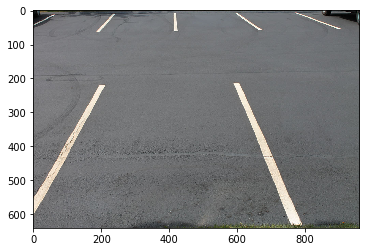

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math

# reading in an image

image = mpimg.imread('parkingline.jpg')

# printing out some stats and plotting the image

print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)
plt.show()


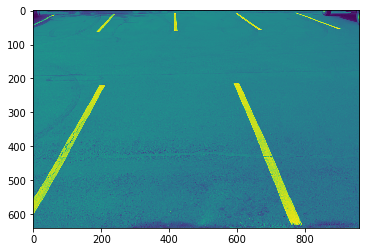

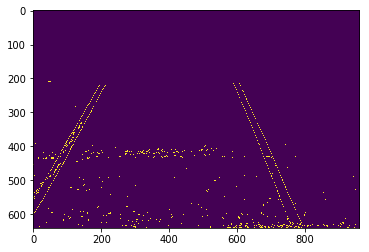

In [50]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)

    match_mask_color = 255 # This line altered for grayscale.
    
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image



height = image.shape[0]
width = image.shape[1]

region_of_interest_vertices = [
    (0, height),
    (0, 100),
    (width, 100),
    (width, height),
]

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(gray_image)

plt.show()


cannyed_image = cv2.Canny(gray_image, 130, 200)

# Moved the cropping operation to the end of the pipeline.
cropped_image = region_of_interest(
    cannyed_image,
    np.array([region_of_interest_vertices], np.int32)
)

plt.figure()
plt.imshow(cropped_image)

plt.show()

In [58]:
lines = cv2.HoughLinesP(
    cropped_image,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25
)
print(lines)

[[[571 639 636 639]]

 [[728 491 791 634]]

 [[663 630 823 630]]

 [[ 82 424 134 343]]

 [[519 634 814 634]]

 [[ 80 429 149 322]]

 [[269 425 540 411]]

 [[  2 599 102 426]]

 [[  1 552  38 494]]

 [[644 298 722 473]]

 [[643 342 698 484]]

 [[ 23 519 197 219]]

 [[559 632 864 632]]

 [[519 636 825 636]]

 [[413 431 454 431]]

 [[ 15 433 106 433]]

 [[305 419 362 419]]

 [[338 432 381 432]]

 [[302 417 345 415]]

 [[ 13 434  97 434]]

 [[178 281 203 237]]

 [[170 421 214 419]]

 [[352 429 507 429]]

 [[393 419 471 419]]

 [[314 418 412 413]]

 [[537 633 824 633]]

 [[749 625 789 625]]

 [[519 635 813 635]]

 [[674 363 706 435]]

 [[ 75 445 117 380]]

 [[678 429 748 609]]

 [[680 627 789 627]]

 [[271 420 413 420]]

 [[190 416 348 416]]

 [[  3 553 195 220]]

 [[ 85 431 136 343]]

 [[628 310 658 378]]

 [[672 359 705 433]]

 [[125 378 166 306]]

 [[413 430 478 427]]

 [[ 58 432 110 432]]

 [[ 79 436 137 335]]

 [[702 430 743 523]]

 [[361 431 518 423]]

 [[581 627 631 627]]

 [[271 414

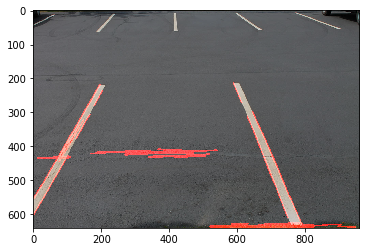

In [59]:
def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    # If there are no lines to draw, exit.
    if lines is None:
        return

    # Make a copy of the original image.
    img = np.copy(img)

    # Create a blank image that matches the original in size.
    line_img = np.zeros(
        (
            img.shape[0],
            img.shape[1],
            3
        ),
        dtype=np.uint8,
    )

    # Loop over all lines and draw them on the blank image.
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)

    # Merge the image with the lines onto the original.
    img = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)

    return img

line_image = draw_lines(image, lines) # <---- Add this call.

plt.figure()
plt.imshow(line_image)

plt.show()


In [66]:
from __future__ import division


left_line_x = []
left_line_y = []
right_line_x = []
right_line_y = []

for line in lines:
    for x1, y1, x2, y2 in line:
        
        slope = (y2 - y1) / (x2 - x1) # <-- Calculating the slope.
        print(slope)
        if math.fabs(slope) < 0.5: 
            #print(math.fabs(slope))
            continue
        if slope <= 0: # <-- If the slope is negative, left group.
            left_line_x.extend([x1, x2])
            left_line_y.extend([y1, y2])
        else: # <-- Otherwise, right group.
            right_line_x.extend([x1, x2])
            right_line_y.extend([y1, y2])

min_y = int(image.shape[0] * (2 / 5)) # <-- Just below the horizon
max_y = image.shape[0] # <-- The bottom of the image

poly_left = np.poly1d(np.polyfit(
    left_line_y,
    left_line_x,
    deg=1
))

left_x_start = int(poly_left(max_y))
left_x_end = int(poly_left(min_y))

poly_right = np.poly1d(np.polyfit(
    right_line_y,
    right_line_x,
    deg=1
))

right_x_start = int(poly_right(max_y))
right_x_end = int(poly_right(min_y))

0.0
2.2698412698412698
0.0
-1.5576923076923077
0.0
-1.5507246376811594
-0.05166051660516605
-1.73
-1.5675675675675675
2.2435897435897436
2.581818181818182
-1.7241379310344827
0.0
0.0
0.0
0.0
0.0
0.0
-0.046511627906976744
0.0
-1.76
-0.045454545454545456
0.0
0.0
-0.05102040816326531
0.0
0.0
0.0
2.25
-1.5476190476190477
2.5714285714285716
0.0
0.0
0.0
-1.734375
-1.7254901960784315
2.2666666666666666
2.242424242424242
-1.7560975609756098
-0.046153846153846156
0.0
-1.7413793103448276
2.268292682926829
-0.050955414012738856
0.0
0.0
2.32
0.0
0.057692307692307696
0.0
0.0
0.0
0.0
0.04918032786885246


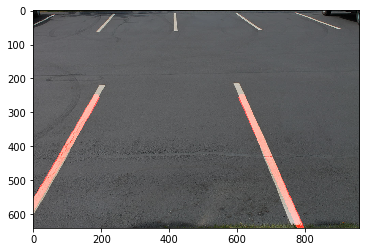

In [67]:

line_image = draw_lines(
    image,
    [[
        [left_x_start, max_y, left_x_end, min_y],
        [right_x_start, max_y, right_x_end, min_y],
    ]],
    thickness=20)

plt.figure()
plt.imshow(line_image)

plt.show()